### Overview

This JupyTer notebook demonstrates the extraction of metadata from all files of a given directory into a `.csv` file. It then performs analytics on the types of files contained in the directory

In [1]:
from file_processing import Directory

#### Defining the directory to analyze

Point to the directory of interest. For absolute paths, format using one of these formats: `r'C:\...\...'` or `'C:\\...\\'` or `'C:/.../...'` (dependent on OS)

When defining the directory to analyze, the following can be set:
* `path` (str): Path to the directory
* `use_ocr` (bool; False): Whether to use ocr on all ocr applicable files
* `use_transcribers` (bool; False): Whether to use transcribers on all transcription applicable files

In [2]:
directory = Directory('./tests/resources/',use_ocr=False, use_transcribers=False)

#### Exploring the CSV report

`directory.generate_report()` accepts the following:

* `report_file` (str): Path to the output csv file
* `include_text` (bool; False): Whether to include text data from the files in the report
* `filters` (dict; None): Inclusion/exclusion criteria
* `keywords` (list; None): A list of keywords to count in the 'text' field of the metadata
* `check_title_keywords` (bool; False): Whether to scan file names for keywords
* `migrate_filters` (dict; None): Adds a boolean column with 1 if the file satisfies the input criteria, else 0
* `open_files` (bool; True): Whether to open the files to extract file-specific metadata
* `split_metadata` (bool; False): Whether to split the file-specific metadata object such that each field has its own column
* `char_limit` (int; 3000): The cut-off length for each metadata field

A sample filter parameter is shown below. The `exclude_str` and `include_str` options will check the file path for the given strings and exclude or include accordingly. These options can also be used to target specific file names in addition to directory names.

```py
filter = {
    'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__']
    'include_str': ['file_processing', 'tests', '__init.py__'],
    'extensions': ['.csv', '.docx', '.pptx', '.xlsx', '.pdf'],
    'exclude_extensions': ['.tmp', '', '.py'],
    'min_size': 10000,
    'max_size': 50000
}
```

In [3]:
directory.generate_report(
    report_file='./docs/sample_reports/report.csv',
    split_metadata=True,
    filters={'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__', '.git']},
    migrate_filters={'extensions': ['.csv', '.docx', '.pdf', '.pptx']},
    include_text=True,
    keywords=['Health', 'Canada', 'Classified', 'Protected']
)

Processing batches: 0 batches completed [00:00, ? batches completed/s]ERROR:root:Error processing ./tests/resources/directory_test_files_corrupted/government_of_canada_wikipedia_corrupted.txt: FileProcessingFailedError
ERROR:root:Error processing ./tests/resources/test_files/MapCanada_corrupted.jpg: FileProcessingFailedError
ERROR:root:Error processing ./tests/resources/test_files/SampleReportScreenShot_corrupted.pdf: FileProcessingFailedError
ERROR:root:Error processing ./tests/resources/test_files/Health - Canada.ca_corrupted.html: FileProcessingFailedError
ERROR:root:Error processing ./tests/resources/test_files/coffee_corrupted.json: FileCorruptionError
ERROR:root:Error processing ./tests/resources/test_files/callbacks_corrupted.py: FileProcessingFailedError
ERROR:root:Error processing ./tests/resources/test_files/sample_speech_corrupted.mp3: FileProcessingFailedError
ERROR:root:Error processing ./tests/resources/test_files/Test_for_RTF_corrupted.rtf: FileProcessingFailedError
ERRO

#### Aggregating data by file type

In [4]:
import pandas as pd

analytics = directory.generate_analytics(
    report_file='./docs/sample_reports/analytics.csv', 
    filters={'exclude_str': ['.venv', '.pytest_cache', '.vscode', '__pycache__', '.git']}
)
df = pd.DataFrame.from_dict((analytics))
df

Processing files: 124 files completed [00:00, 8959.87 files completed/s]


,size (MB),count
.abcd,0.000020,1
.aiff,0.101814,1
.csv,17.483252,4
.docx,0.097953,6
.flac,0.211733,1
.gif,4.332710,6
.heic,0.224590,2
.heif,0.224590,2
.html,0.496281,3
.jpeg,0.008800,1


#### Visualizing the filtered data

In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'File types by Count and Size (mb)')

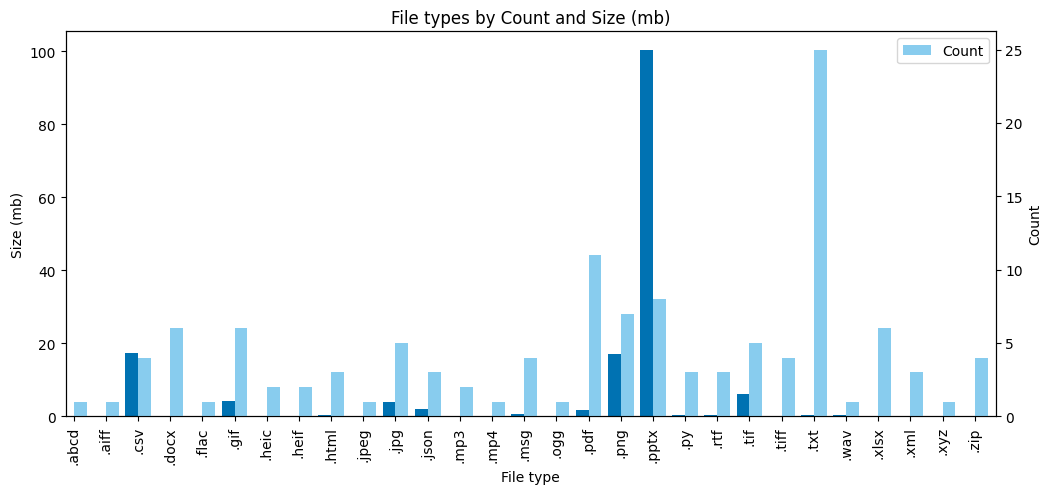

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax2.yaxis.get_major_locator().set_params(integer=True)

width = 0.4

(df['size (MB)']).plot(kind='bar', color='#0072b2', ax=ax, width=width, position=1, label='Size (mb)')
df['count'].plot(kind='bar', color='#88ccee', ax=ax2, width=width, position=0, label='Count')

ax.set_ylabel('Size (mb)')
ax2.set_ylabel('Count')
ax.set_xlabel('File type')

plt.legend()
plt.title('File types by Count and Size (mb)')


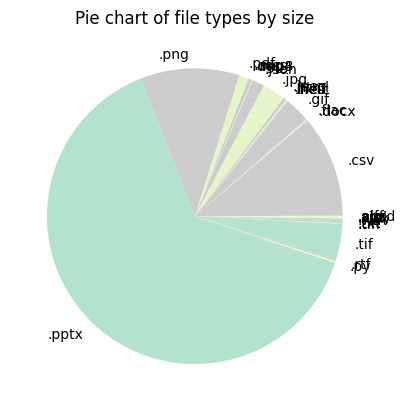

In [7]:
import numpy as np

labels = df.index
sizes = df['size (MB)']

cmap = plt.get_cmap("Pastel2")

plt.title('Pie chart of file types by size')
plt.pie(sizes, labels=labels, colors=cmap(np.arange(3)*4))
plt.show()